<a href="https://colab.research.google.com/github/codestates/ds-section1-sprint1-new/blob/main/n111%20%26%20n112%20-%20EDA/n111_%26_n112_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 1*

---

# Exploratory Data Analysis

## 🏆 학습 목표 
- EDA에 대해서 이해한다.
- Feature Engineering의 목적을 이해할 수 있다. 
- Business Insight를 도출할 수 있다.
---

# **🍷 Case Study: Wine Data**
맛있는 요리를 만들기 위해서 가장 먼저 해야 할 일은, 식재료를 준비하는 일입니다.  
재료의 신선도를 확인하고, 다듬는 등의 여러 준비 과정이 필요하죠.  

마찬가지로 데이터 분석이라는 요리를 하기 위해서는, 데이터를 이리저리 둘러보며 준비할 필요가 있습니다.  
이처럼 데이터를 다양한 각도로 관찰하고 이해하는 과정을 **`EDA`**라고 합니다.  

이번 노트를 통해 **`EDA`**를 시행해보고, 그 결과를 Business Insight로 까지 연결시켜 봅시다.

<br>

Case Study는 아래의 구성으로 이뤄져 있습니다.
- **Part 0. Introduction**  
  0-1. 기획 배경  
  0-2. Data Description  

- **Part 1. Gathering Data**  

- **Part 2. EDA**  
  2-1. Pandas 메서드로 보는 간단한 탐색  
  2-2. Feature Engineering  
  2-3. 통계값 및 시각화 활용  

- **Part 3. Business Insight**
- **Part 4. Conclusion**  

# **Part 0. Introduction**

<img width='500' src='https://i.imgur.com/PTHXXaZ.png'>

## **0-1. 기획 배경**
*'음식은 과학이다 '* 라는 말이 있듯이, 와인은 다양한 성분 배합의 결과물입니다.  
화학적 요소들이 어떻게 조합되느냐에 따라 와인의 quality는 달라질 것입니다.  

그렇다면 **`높은 quality의 와인은 어떤 화학적 특징을 가지고 있을까요?`**  
이번 Case Study를 통해, 와인 quality에 영향을 미치는 성분들을 살펴봅시다.

## **0-2. Data Description**
Red Wine과 White Wine, 2개의 DataSet을 이용하도록 합시다.  
각 DataSet에는, 와인을 구성하는 11개의 화학 성분과 quality 정보가 담겨 있습니다.  

우리는 이 데이터를 통해 **다양한 와인의 성분과 등급 사이의 관계를 알아보려고 합니다.**   
아래의 데이터 description을 살펴보고, 데이터를 통해 어떤 business questions을 도출할 수 있을지 생각해 봅시다.
<br>

`Independent Variables:`
- fixed_acidity (결합산) : 와인의 산도를 제어한다.
- volatile_acidity (휘발산) : 와인의 향과 연관된다. 
- citric_acid (구연산) : 와인의 산도를 높이기 위해 사용되며, 신선함을 올려주는 역할을 한다. 
- residual_sugar (잔여 설탕) : 와인의 단맛을 올려준다.
- chlorides (염화나트륨) : 농도에 따라 와인에 짠맛을 주며, 신맛을 좌우한다. 
- free_sulfur_dioxide (유리 아황산) : 이스트 발효의 부산물이다. 항산화제로 산화 방지, 살균 작용, 갈변 방지 등을 한다. 
- total_sulfur_dioxide (총 아황산) : 와인을 오래 보관하는 역할이며, 향과 연관된다.  
- density (밀도) : 바디의 높고 낮음을 표현하는 와인의 무게감을 의미한다. 
- pH (산성도) : 와인의 신맛의 정도를 나타낸다. 
- sulphates (황산염) : 와인의 향을 보존시킨다. 
- alcohol (알코올) : 와인의 바디감에 영향을 미친다. 단맛과 산성의 균형을 유지하도록 돕는다. 

`Dependent Variable:`
- quality : 와인 등급으로 0~10 사이의 값(정수)을 갖는다. 

# **Part 1. Gathering Data**
EDA를 시행하기 위해서는, 무엇보다도 먼저 데이터를 불러와야 합니다!

데이터를 불러오는 방법은 다양합니다!  
URL을 통해 데이터를 불러올 수도 있고, 로컬 파일을 직접 업로드 할 수도 있죠.

이번 노트에서는 Pandas 라이브러리의 **`.read_csv()`** 메서드를 활용해 봅시다.  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터 업로드
from google.colab import files
uploaded = files.upload()

In [ ]:
# .read_csv() 활용하여 데이터 불러오기
df_red = pd.read_csv('winequality-red.csv')
df_red.head()

,fixed_acidity;volatile_acidity;citric_acid;residual_sugar;chlorides;free_sulfur_dioxide;total_sulfur-dioxide;density;pH;sulphates;alcohol;quality
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


> **💡 Tip**  
**`csv`**는 *Comma Separated Value*의 약자로, 데이터가 **`,(콤마)`** 로 구분되어 있는 파일을 의미합니다.  
따라서 **`.read_csv()`** 메서드는 콤마로 구분된 데이터를 불러오는 방법입니다.  
<br>
만약 위와 같이, **콤마가 아닌 다른 값으로 구분되어 있는 데이터는 어떻게 불러와야 할까요?**

In [ ]:
# sep=';' 파라미터 지정
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# sep=';' 파라미터 지정
df_white = pd.read_csv('winequality-white.csv', sep=';')
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


> **💡 Tip**  
데이터가 콤마가 아닌 다른 값으로 구분되어 있는 경우, **`sep` 파라미터를 지정**해야 합니다.  
위와 같이 데이터가 **`;`** 로 나누어져 있다면, **`sep=';'`**를 지정해야겠죠?  
이처럼 `.read_csv()` 메서드의 파라미터를 올바르게 지정하지 않는다면, 데이터를 원하는 대로 불러올 수 없습니다.  
<br>
추가적으로 `.read_csv()` 의 공식 문서에서 다양한 파라미터를 확인해 보도록 합시다.  
[`.read_csv()` 공식 문서](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

<br>

---

# **Part 2. EDA**  
앞서 **`EDA`**란 식재료를 준비하는 일처럼, **데이터를 다각도로 관찰하며 이해하는 단계**라고 했습니다.

Raw data(원본 데이터)를 보며 바로 인사이트를 얻기란 어려울 것입니다.  
따라서 데이터를 분석하기 이전에, **통계치와 시각화를 통해 데이터를 먼저 이해하는 과정**이 필요합니다!  
어떤 데이터인지 알고 있어야 세부적인 분석이나 모델링 진행을 할 수 있겠죠?
<br>  
Part 2 에서는, 아래의 세 단계로 EDA를 진행해 봅시다.  
  2-1. Pandas 메서드로 보는 간단한 탐색  
  2-2. Feature Engineering  
  2-3. 통계값 및 시각화 활용  



## **2-1. Pandas 메서드로 보는 간단한 탐색**
먼저, **Pandas 메서드를 활용해 데이터를 살펴봅시다.**

우리가 데이터에서 확인해야 할 특징들은 아래와 같습니다.
- 각 데이터셋의 shape 및 column 개수
- 결측치 및 중복 데이터 여부
- 타겟인 `quality` column의 유니크한 값의 개수

<h3><b> 1) .shape </b></h3>  

<img src = 'https://i.imgur.com/sc9sR2j.png' width=800>  
pandas의 dataframe은, 위와 같이 테이블 형태의 데이터입니다.   
일반적으로 **하나의 Row에는 하나의 데이터(관측치)**, **하나의 Column에는 하나의 변수**를 저장합니다.   

데이터의 Row와 Column의 개수를 확인하기 위해, `.shape`을 활용해 봅시다.

In [ ]:
# Red wine 데이터셋의 shape 확인
print(df_red.shape) # (Rows, Columns)의 형태로 출력

(1599, 12)


In [ ]:
# White wine 데이터셋의 shape 확인
print(df_white.shape)

(4898, 12)


<h3><b> 2) .info() </b></h3>  

데이터셋의 각 feature에 대한 통합적인 정보는 `.info()`와 `.describe()` 2가지 방법으로 살펴볼 수 있습니다.  
이번 노트에서는 `.info()`로 확인해 보겠습니다.

`.describe()`와의 출력과는 어떻게 다른지, 꼭 확인해 보세요!

In [ ]:
# Red wine 데이터셋의 info 확인
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur-dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# White wine 데이터셋의 info 확인
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<h3><b> 3) .duplicated() </b></h3>  

정확한 데이터 분석을 하기 위해서는, 중복 데이터 유무를 확인하는 과정이 중요합니다.  
`duplicated()`를 통해 중복된 데이터가 있는지 확인해 봅시다.

In [ ]:
# Red wine 데이터셋의 중복된 데이터 개수 확인
df_red.duplicated().sum()

240

In [ ]:
# drop_duplicates()를 통해 중복된 데이터 제거
df_red = df_red.drop_duplicates()
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


> **💡 Tip**  
중복된 데이터를 제거했더니, `index = 4`의 데이터가 빠져 있습니다!  
index 정렬이 되어 있지 않으면, 추후 분석과정에 오류가 생길 수 있습니다.  
<br>
따라서 `.reset_index()`를 적용하여 index를 재정렬 해줍시다.  
아래의 공식 문서를 보고, `drop` 파라미터의 기능을 생각해 보세요.  
[`.reset_index()` 공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)

In [ ]:
# index 재정렬
df_red = df_red.reset_index(drop=True)
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# 중복데이터 제거 후, shape 확인
df_red.shape

(1359, 12)

In [ ]:
# White wine 데이터셋의 중복된 데이터 개수 확인
df_white.duplicated().sum()

937

In [ ]:
# drop_duplicates() 를 통해 중복된 데이터 제거
df_white = df_white.drop_duplicates()

# index 재정렬
df_white = df_white.reset_index(drop=True)
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [ ]:
# 중복데이터 제거 후, shape 확인
df_white.shape 

(3961, 12)

## **2-2. Feature Engineering**

#### **Garbage In, Garbage Out!**
<img src = 'https://i.imgur.com/c6WHRyH.png' width=550>  
실제 사용하는 데이터는 대부분 매우 지저분한 상태인데, 이러한 데이터는 머신러닝과 같은 모델에서 제대로 작동하지 않습니다.  
모델링뿐 아니라 간단한 분석을 하더라도, 데이터를 깨끗하게 정제 할 필요가 있겠죠?

<br><br>

#### **Feature Engineering**  
세세한 분석과 모델의 성능을 높이기 위해서, feature를 재조합하여 의미있는 데이터를 추가적으로 만들 수 있습니다.  
이러한 과정을 **`Feature Engineering`(특성공학)**이라 합니다.  
다시말해,  도메인 지식과 창의성을 바탕으로 **기존 feature들을 재조합하여 새로운 feature를 만드는 과정**이라는 것이죠!  
수학적인 연산과 도메인 지식을 이용하여 Raw Data로부터 유용한 feature를 도출해 내는 과정을 `Feature Engineering`이라 할 수 있습니다.  
<br>  

<img src = 'https://i.imgur.com/RD9W6xq.png' width=500>  
예시로 위의 그림을 살펴 봅시다.  
Raw Data로부터 *(Price / Weight)* 를 계산하여 `Price_per_Weight`를 만들어내는 과정이, **`Feature Engineering`**에 해당합니다.  
그럼 `Price_per_Weight` 컬럼은 **`Feature Engineering`**의 결과물이겠죠?

<h3><b> 1) .repeat() </b></h3>

데이터 분석을 효율적으로 하기 위해, 2개로 분리된 DataSet을 합쳐봅시다.  

그럼 각 데이터의 *Red / White* 정보가 담긴, 새로운 column이 추가 **굵은 텍스트**되어야 할 것입니다!  
이를 `.repeat()` 메서드를 활용해 **`Feature Engineering`**을 시행해 봅시다.


In [ ]:
# red dataframe에 red를 나타내는 array 생성
red_color = np.repeat('red', len(df_red))
red_color

array(['red', 'red', 'red', ..., 'red', 'red', 'red'], dtype='<U3')

In [ ]:
# white dataframe에 white를 나타내는 array 생성
white_color = np.repeat('white', len(df_white))
white_color

array(['white', 'white', 'white', ..., 'white', 'white', 'white'],
      dtype='<U5')

In [ ]:
# 위에서 만든 array를 dataframe 추가
df_red['color'] = red_color
df_white['color'] = white_color

In [ ]:
# 새 컬럼, 'color'가 red 데이터셋에 추가되었는지 확인
df_red.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur-dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [ ]:
# 새 컬럼, 'color'가 white 데이터셋에 추가되었는지 확인
df_white.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

> **💡 Tip**  
Feature Engineering의 결과로 `color` 컬럼이 추가되었다면, 이제 2개의 데이터를 합쳐 봅시다.  
<br>
dataframes을 합치기 위해서는, 합치려는 데이터셋의 columns가 동일한지 확인해야 합니다!  
위와 같이 `.columns`를 통해 시각적으로 확인할 수도 있지만, 아래의 코드를 통해 확인할 수도 있습니다. 

In [ ]:
# 합치려는 데이터셋의 columns가 동일한지 확인
set(df_red.columns) == set(df_white.columns)

False

> **💡 Tip**  
두 개의 dataframes의 컬럼이 동일하지 않다고 합니다!  
무엇이 문제일까요?  
<br>
자세히 살펴보니, **`df_red`**에서 `total_sulfur-dioxide`컬럼의 이름이 `_`가 아닌 **`-`**으로 연결되어 있는 것을 알 수 있습니다.  
데이터를 합치기 위해 컬럼의 이름을 수정해 줍시다.

In [ ]:
# column의 이름 통일을 위해, 수정
df_red.rename(columns = {'total_sulfur-dioxide' : 'total_sulfur_dioxide'}, inplace=True)

In [ ]:
df_red.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [ ]:
df_white.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [ ]:
# 합치려는 데이터셋의 columns가 동일한지 확인
set(df_red.columns) == set(df_white.columns)

True

<h3><b> 2) .append() </b></h3>



이제, Pandas의 `.append()`를 사용하여 두 개의 dataframes을 합쳐줍시다.  
[`.append()` 공식문서](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html)

In [ ]:
# 하나의 데이터셋으로 통합
df = df_white.append(df_red, ignore_index = True)

In [ ]:
# 두 개의 dataframes 잘 합쳐졌는지 확인
df.shape

(5320, 13)

In [ ]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white


In [ ]:
# 합쳐진 dataframe은 우리가 분석하고자 하는 final version이기 때문에, csv 파일로 저장!
df.to_csv('winequality_edited.csv', index=False) 

> **💡 Tip**  
`.to_csv()` 메서드를 사용하여 데이터프레임을 csv 파일로 export 할 때,  
`index=False` 파라미터를 지정하게 되면 아래와 같이 첫 번째 컬럼이 인덱스로 지정됩니다.  
**이를 꼭 지정해서 export 해주세요!** 그 이유는 아래에서 다시 **`winequality_edited.csv`**를 불러왔을 때 알 수 있습니다.  
<img width='700' src='https://i.imgur.com/8lZXtWz.png'>





## **2-3. 통계값 및 시각화 활용**
> ⚠️ ***눈으로 코드를 이해하기 보다는, 꼭 실행하고 변경하며 살펴보시길 바랍니다.***

<br>

통계 및 시각화 기법을 활용하기 이전에, 우리가 해당 데이터를 분석하는 목적을 다시 한 번 생각해 봅시다!  
우리는 **`높은 quality의 와인은 어떤 화학적 특징을 가지고 있는지`** 살펴보려 합니다.  
그렇다면 와인 quality에 영향을 미치는 성분, 즉 ***와인의 특징(색, 산도, 맛, 아로마, 바디감, 알콜)과 quality 간의 관계*** 를 알아보면 좋을 것 같습니다.

<br>

그럼 와인의 특징과 quality 사이의 관계를,  
**통계기법**(평균, 분산, 표준편차 등)과 **시각화**를 통해 다방면으로 데이터를 분석해 봅시다.

이번 노트에서는 `groupby()`와 `query()`를 활용해, 원하는 데이터를 추출하여 살펴보려 합니다.  

In [ ]:
# 저장했던 통합 데이터셋 업로드
wine_df = pd.read_csv('winequality_edited.csv')

In [ ]:
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white


<h2><b> 1) .groupby() </b></h2>

먼저 Pandas를 사용해서 데이터 분석을 할 때, **데이터 집계(aggregation)에서 유용하게 사용하는 `.groupby()`** 메서드에 대해 알아봅시다.  
`.groupby()`를 이용하면 **데이터를 그룹으로 묶어, 그룹별 통계연산과 집계, 요약**을 빠르게 할 수 있습니다.


예를 들어,  
와인의 등급(color) 별로 feature들의 평균을 구하고 싶은 경우, 아래과 같이 `.groupby()`를 사용하여 평균값(mean)을 구할 수 있습니다.
```python
wine_df.groupby('quality').mean()
```

물론 평균 이외의 다양한 summary statistics를 구할 수도 있습니다!  
[`.groupby()` 공식문서](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

<h3><b> 1-a) color </b></h3>

와인의 가장 눈에 띄는 특징은 **와인의 색상(color)**이 될 것입니다.  

그렇다면 과연,  
**Red와 White 중에서, 어떤 종류의 와인이 더 높은 평균 quality rating을 받을까요?**  
분석하기 이전의 여러분의 생각은 어떤가요?

In [ ]:
# mean function으로 각 컬럼의 평균값을 구할 수 있음
wine_df.mean() # 하지만 와인의 color에 따른 평균 quality 를 비교할 수는 없음

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


fixed_acidity             7.215179
volatile_acidity          0.344130
citric_acid               0.318494
residual_sugar            5.048477
chlorides                 0.056690
free_sulfur_dioxide      30.036654
total_sulfur_dioxide    114.109023
density                   0.994535
pH                        3.224664
sulphates                 0.533357
alcohol                  10.549241
quality                   5.795677
dtype: float64

In [ ]:
# 와인의 색깔에 따른 평균 quality rating을 알아보기 위해, groupby 활용
wine_df.groupby('color').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
color,,,,,,,,,,,,
red,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
white,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835


In [ ]:
# 위의 많은 컬럼 중 quality 컬럼 하나만을 선택하여 확인
wine_df.groupby('color')['quality'].mean()

color
red      5.623252
white    5.854835
Name: quality, dtype: float64

In [ ]:
# 위와 같이 groupby 안에 지정하는 컬럼들은 데이터프레임의 인덱스로 지정됨.
# 이를 원하지 않으면 'as_index=False' 파라미터를 지정
wine_df.groupby('color', as_index=False)['quality'].mean()

,color,quality
0,red,5.623252
1,white,5.854835


In [ ]:
wine_df['color'].value_counts()

white    3961
red      1359
Name: color, dtype: int64

> **🔎 해설**  
와인의 color에 따른 quality를 통계적으로 살펴보니, **white 와인이 근소하게 높은 평균 quality를 가짐**을 확인할 수 있습니다.  

<br>

> 하지만 이 원인이,  
단순하게 white 와인 데이터가 많기 때문인지 혹은 실제로 white 와인의 quality가 평균적으로 높은지는 추가적인 분석이 필요해 보입니다.


<h3><b> 1-b) pH </b></h3>

와인의 **pH** 지수는, **와인의 품질 보존과 산미를 결정짓는 중요한 성분**입니다.  

일반적으로 와인은 3~4 pH를 띄며, white와인이 red에 비해 산도가 높습니다.  
그렇다면 이 **pH 지수는 와인의 quality에 영향을 미칠 것**이라고 여겨집니다.  
과연 그런지 분석을 통해 알아봅시다.

먼저 color에 따른 평균 pH 지수를, 와인의 quality에 따라 살펴봅시다!

In [ ]:
# 와인의 quality에 따른 각 컬럼의 평균값 확인
wine_df.groupby('quality').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.304369,0.462379,0.271505,4.034951,0.060510,20.332524,101.516990,0.994802,3.235874,0.507476,10.215049
5,7.333248,0.393970,0.305845,5.481906,0.066039,29.797660,119.572203,0.995734,3.214275,0.529041,9.872211
6,7.169027,0.315626,0.324671,5.153142,0.054366,30.777873,114.433491,0.994377,3.224120,0.534313,10.649060
7,7.122021,0.292342,0.336040,4.171320,0.045218,29.977220,105.157126,0.992838,3.240479,0.549638,11.511020
8,6.820270,0.302973,0.340541,4.771622,0.040385,33.108108,111.976351,0.992130,3.239595,0.519054,11.912162
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [ ]:
# groupby는 하나 이상의 컬럼으로 묶을 수 있음
# quality, color로 그룹지어, 각 컬럼의 평균값 확인
wine_df.groupby(['quality', 'color']).mean()

fixed_acidity  volatile_acidity  ...  sulphates    alcohol
quality color                                   ...                      
3       red         8.360000          0.884500  ...   0.570000   9.955000
        white       7.600000          0.333250  ...   0.474500  10.345000
4       red         7.779245          0.693962  ...   0.596415  10.265094
        white       7.139869          0.382157  ...   0.476667  10.197712
5       red         8.171231          0.578596  ...   0.623570   9.888562
        white       6.921745          0.303306  ...   0.482621   9.864182
6       red         8.337383          0.496084  ...   0.674542  10.658879
        white       6.819435          0.261630  ...   0.492355  10.646122
7       red         8.858683          0.403653  ...   0.742635  11.491118
        white       6.701089          0.265363  ...   0.502859  11.515844
8       red         8.441176          0.427647  ...   0.774706  12.158824
        white       6.609924          0.286794  ...   0.485878  11.880153
9       white       7.420000          0.298000  ...   0.466000  12.180000

[13 rows x 11 columns]

In [ ]:
wine_df.groupby(['quality', 'color'], as_index=False).mean()

,quality,color,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,3,red,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
1,3,white,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
2,4,red,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
3,4,white,7.139869,0.382157,0.305229,4.499346,0.050059,23.127451,124.127451,0.994199,3.185425,0.476667,10.197712
4,5,red,8.171231,0.578596,0.244523,2.509532,0.093971,17.161179,57.406412,0.997082,3.300815,0.623570,9.888562
5,5,white,6.921745,0.303306,0.335957,6.941532,0.052323,36.002979,150.099574,0.995072,3.171779,0.482621,9.864182
6,6,red,8.337383,0.496084,0.279364,2.457290,0.085075,15.637383,40.816822,0.996565,3.318000,0.674542,10.658879
7,6,white,6.819435,0.261630,0.338227,5.959787,0.045178,35.308166,136.460850,0.993722,3.196029,0.492355,10.646122
8,7,red,8.858683,0.403653,0.371856,2.716766,0.076832,13.994012,35.449102,0.996051,3.290060,0.742635,11.491118
9,7,white,6.701089,0.265363,0.327358,4.523875,0.037556,33.851234,122.052975,0.992059,3.228462,0.502859,11.515844


In [ ]:
# 위의 많은 컬럼 중, 알아내고자 하는 pH 컬럼을 선택하여 확인
wine_df.groupby(['quality', 'color'], as_index=False)['pH'].mean()

,quality,color,pH
0,3,red,3.398000
1,3,white,3.187500
2,4,red,3.381509
3,4,white,3.185425
4,5,red,3.300815
5,5,white,3.171779
6,6,red,3.318000
7,6,white,3.196029
8,7,red,3.290060
9,7,white,3.228462


> **🔎 해설**  
위의 통계치를 통해,  
**같은 quality라 하더라도, white 와인이 red에 비해 pH 지수가 더 낮음**을 확인할 수 있습니다.

<br>

>그렇다면 **color의 구분없이, 어떤 pH 지수 등급을 가진 와인이 더 높은 평균 quality rating을 받을까요?**  
<img width='600' src='https://i.imgur.com/d973iK2.png'>  
위의 그림과 같이, **와인의 pH 등급은 *4단계* 로 구분**할 수 있습니다.  
  - **Low**: Lowest 25% pH values
  - **Medium**: 25% - 50% of pH values
  - **Moderately High**: 50% - 75% of pH values
  - **High**: max pH values

In [ ]:
wine_df.pH.describe()

count    5320.000000
mean        3.224664
std         0.160379
min         2.720000
25%         3.110000
50%         3.210000
75%         3.330000
max         4.010000
Name: pH, dtype: float64

> **💡 Tip**  
`pH`은 continuous data입니다.  
하지만 우리는, pH 등급에 따라 quality rating이 어떻게 달라지는지 알아보려 합니다.  
<br>
> 따라서 `pH`의 continuous data를 **category data로 변경**하도록 합시다!  
Continuous data를 category로 바꾸는 방법으로는, Pandas의 `cut` function을 이용합시다.  
`cut`의 `bins` 파라미터는, `.describe()`를 이용하여 확인한 **4분위수**를 활용할 수 있습니다.

In [ ]:
# 'wine_df.pH.describe()'를 통해 확인한, 4분위수를 활용하여 bins로 입력
bins = [2.72, 3.11, 3.21, 3.33, 4.01]

# 범위에 따라 원하는 레이블명을 입력
labels = ['Low', 'Medium', 'Moderately High', 'High']

#'cut'을 통해 continuous data를 category data로 변경
wine_df['ph_levels'] = pd.cut(x=wine_df['pH'], bins=bins, labels=labels)

In [ ]:
# 결과 확인을 위해, 상위 5개 데이터 출력
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,ph_levels
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,Low
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,Moderately High
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,Moderately High
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Medium
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white,Medium


In [ ]:
# ph_levels 에 따른 평균 quality 확인
wine_df.groupby('ph_levels', as_index=False)['quality'].mean()

,ph_levels,quality
0,Low,5.728024
1,Medium,5.766917
2,Moderately High,5.852624
3,High,5.834254


> **🔎 해설**  
`pH`를 4개의 등급으로 나눈 뒤, 각 등급에 따른 평균 quality rating을 확인해 보았습니다.  
- 그 결과 비교적 **`pH`가 높은 등급이 높은 quality**를 기록한 것을 확인할 수 있습니다.  
- 또한 **`High`등급보다 `Moderately High`등급의 quality가 근소하게 높은 것**을 볼 수도 있습니다.  
이는 와인의 pH가 높다고해서 무조건 좋은 것은 아니라는 의미입니다.  
와인은 여러 풍미와 요소들이 조화를 이루고 있는 게 중요합니다!

<br>  

> 따라서 계속해서 다른 성분과 quality의 관계가 어떻게 이뤄지는지 확인해 봅시다.



<h3><b> 1-c) residual_sugar / chlorides </b></h3>

`pH`가 품질 보존뿐만 아니라 신맛을 담당한다면, 다른 맛은 어떤 성분에 영향을 받을까요?  
우리가 와인의 맛을 떠올려 본다면, 여러 풍미 중에서도 **단맛과 떫은맛**에 대해 생각이 납니다.  

이번 데이터 속에서 **단맛**은 `residual_sugar(잔류 설탕)`, **떫은맛**은 `chlorides(염화나트륨)`을 살펴보면 좋을 것 같습니다.

먼저 단맛, `residual_sugar(잔류 설탕)`을 살펴봅시다.

In [ ]:
# 색상에 따른 평균 잔류설탕 확인
wine_df.groupby('color').mean()['residual_sugar'] # 화이트 와인이 월등히 높음

color
red      2.523400
white    5.914819
Name: residual_sugar, dtype: float64

In [ ]:
wine_df.groupby(['quality', 'color'], as_index=False)['residual_sugar'].mean()

,quality,color,residual_sugar
0,3,red,2.635000
1,3,white,6.392500
2,4,red,2.694340
3,4,white,4.499346
4,5,red,2.509532
5,5,white,6.941532
6,6,red,2.457290
7,6,white,5.959787
8,7,red,2.716766
9,7,white,4.523875


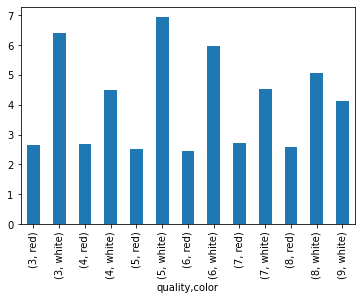

In [ ]:
group_residual_sugar = wine_df.groupby(['quality', 'color'])['residual_sugar'].mean()
group_residual_sugar.plot(kind='bar');

> **🔎 해설**  
- 색상과 quality에 따른 잔류설탕 통계 및 시각화로 확인해 보았습니다.  
- 그 결과, red에 비해 **white 와인의  `residual_sugar`가 월등히 높음**을 알 수 있습니다.  
- 특히 시각화 결과를 본다면, 모든 quality에서 **white 와인이 red에 비해 더 달다**고 확인됩니다!

<br>

> **그렇다면 떫은맛은 어떻게 보면 좋을까요?**  
- 와인에서의 떫은맛은 *tannin(탄닌)* 이라는 성분에 의해 결정되지만, 지금의 데이터 상으로 *'tannin'* 을 확인할 수는 없어보입니다.  
- 하지만 **떫은맛을 간접적으로 확인할 수 있는 짠맛, `chlorides(염화나트륨)`에 대한 데이터가 존재**합니다!  
`chlorides(염화나트륨)`은 포도 껍질에 많은 *tannin(떫은맛)* 을 부드럽게 하여 조절하기 위해 필요합니다.  
- 따라서 `chlorides(염화나트륨)` 성분이 많다는 의미는, 그만큼 와인의 떫은맛이 강하다는 의미겠죠?


In [ ]:
# 색상에 따른 평균 염화나트륨 확인
wine_df.groupby('color').mean()['chlorides'] # 레드와인이 더 높음

color
red      0.088124
white    0.045905
Name: chlorides, dtype: float64

> **🔎 해설**  
<br>
<img width='400' src='https://i.imgur.com/fAsUvQo.png'>  
- **색상에 따른 평균 `chlorides(염화나트륨)`의 수치**를 확인하니, white에 비해 **red가 더 높은 것**을 확인할 수 있습니다.  
  - 이는 white 와인이 껍질없이 발효되고, 청포도로 만들어지기에 쓴맛이 덜하고 상대적으로 단맛이 더 강한 것을 떠올리면 좋습니다.  
반대로 red 와인은 적포도 껍질의 쓴맛을 떠올리면 좋겠죠?  
  - 자연스럽게 red 와인의 떫은맛을 조절하기 위해 `chlorides(염화나트륨)`이 많이 들어가게 됩니다.



<h3><b> 1-d) volatile_acidity </b></h3>

와인을 즐기는데에 있어서 **와인의 향, 아로마(aroma)**도 중요한 역할을 담당합니다.  
물론 많은 성분의 종합적인 결과로 아로마가 형성되지만, 분석의 편의를 위해 `volatile_acidity(휘발성산, 아세트산)` 성분을 눈여겨 봅시다.  




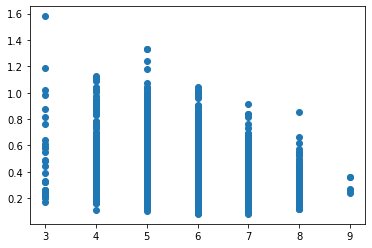

In [ ]:
# quality 에 따른 휘발성산의 차이를 scatter plot 으로 확인
plt.scatter(wine_df['quality'], wine_df['volatile_acidity']);

quality
3    0.517000
4    0.462379
5    0.393970
6    0.315626
7    0.292342
8    0.302973
9    0.298000
Name: volatile_acidity, dtype: float64


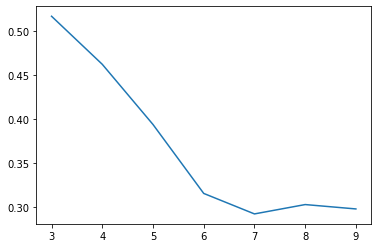

In [ ]:
# quality 에 따른 평균 휘발성산 확인
group_volatile_acidity = wine_df['volatile_acidity'].groupby(wine_df['quality'])
print(group_volatile_acidity.mean())

# plot으로 시각화
plt.plot(group_volatile_acidity.mean());

> **🔎 해설**  
- quality 에 따른 휘발성산의 차이를 두 가지 시각화 방법으로 확인해 봅시다.
  - **scatter plot** 으로 시각화한 결과는, 한 눈에 해석하기 어려워 보입니다.
  - 반면 quality에 따라 평균 `volatile_acidity` 수치를 **lineplot** 으로 확인하니, 상대적으로 변화가 눈에 잘 들어오는 것을 알 수 있습니다.  
  이처럼 **어떤 시각화 방법을 사용하느냐에 따라 데이터 분석의 설득력을 높일 수 있습니다!**
- 시각화 결과, 상대적으로 **quality 등급이 높은 와인이 평균 `volatile_acidity`가 낮음**을 알 수 있습니다.
  - 이는 `volatile_acidity`는 '초산'중 하나로, 시큼하고 자극적인 향을 가지고 있기 때문입니다.  
  따라서 **`volatile_acidity` 성분이 많다면, 와인에서 코를 찌르는듯한 날카로운 냄새**가 나게 됩니다.   
  자연스럽게, 적은 수준의 `volatile_acidity`이라면 와인 본연의 포도향을 잘 드러냅니다.



<h3><b> 1-e) density </b></h3>

와인의 품질을 결정하는 데에 있어서, **와인의 바디감(body)** 역시 중요한 역할을 합니다.  
'바디감'이란, **와인이 입 안에서 얼마나 무게감있게 움직이는지**를 의미하는, **점도**를 말합니다.

바디감 역시, 여러 성분이 종합된 결과이지만 먼저 `density`를 살펴봅시다.


quality
3    0.995744
4    0.994802
5    0.995734
6    0.994377
7    0.992838
8    0.992130
9    0.991460
Name: density, dtype: float64


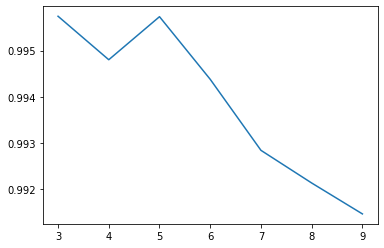

In [ ]:
# quality 에 따른 평균 밀도 확인
group_density = wine_df['density'].groupby(wine_df['quality'])
print(group_density.mean())

# plot으로 시각화
plt.plot(group_density.mean());

> **🔎 해설**  
- `density`는 물의 밀도를 말합니다.
  - 따라서 물의 밀도가 낮을수록, 포도 성분이 짙게 우러나 맛과 향이 진한 와인이 될 것입니다.
  - **lineplot**을 보면 quality가 높아질수록 `density`는 낮아지는, 즉 좋은 와인일수록 물의 밀도가 낮은 와인임을 알 수 있습니다.

<br>

> - 추가적으로 **바디감을 결정하는 중요한 성분은 `alcohol`**입니다.
- 지금까지 `.groupby()`를 활용해 와인의 특성과 quality의 관계를 알아봤다면,  
아래에서는 `.query()` 메서드를 통해 **`alcohol`**에 대해 살펴봅시다.

<h2><b> 2) .query() </b></h2>

데이터프레임에서 원하는 rows를 선택하기 위한 두 가지 방법이 존재합니다.  
  - index 를 사용
  - `.query()` 함수를 사용: [`.query()` 공식문서](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html)
  
두 방법은 같은 결과를 도출하지만, 아래와 같이 사용법이 다릅니다.


```python
# cancer data에서 malignant rows만 선택합니다.
malignant_cancer = df[df['diagnosis'] == 'Malignant']
malignant_cancer = df.query('diagnosis == "Malignant"')
```

<h3><b> 2-a) alcohol </b></h3>

`.query()` 함수를 활용해, **와인의 바디감**을 결정하는데에 중요한 **`alcohol`**을 살펴봅시다.  

`alcohol`은 와인이 얼마나 끈적이는가 하는, **점도(viscosity)에 영향**을 끼칩니다.  
와인의 `alcohol` 도수가 높을수록 점성이 강해지면, 입 안에서 더 가득찬 느낌이 들고 바디감이 높아지게 됩니다.

<br>

그럼 **`alcohol` 도수가 높은 와인이 더 높은 quality 등급을 받는지 알아보기** 위해,  
`alcohol`에 따라 구분되는 3개의 바디감 그룹으로 데이터를 나눕시다.
  - **Light**: alcohol 도수 `12.5% 이하`, 가벼운 바디감  
  - **Medium**: alcohol 도수 `12.5~13.5%`, 미디엄 단계의 와인
  - **Full**: alcohol 도수 `13.5% 이상`, 강한 점성과 무거운 바디감


In [ ]:
# query() 함수를 이용해, 데이터 구분
light_body = wine_df.query("alcohol <= 12.5")
medium_body = wine_df.query("(alcohol > 12.5) and (alcohol < 13.5)")
full_body = wine_df.query("alcohol >= 13.5")

In [ ]:
# 두 개의 데이터프레임이 missing rows 없이 잘 나누어졌는지 확인
print(wine_df.shape)
print(light_body.shape, medium_body.shape, full_body.shape)

(5320, 14)
(4952, 14) (320, 14) (48, 14)


In [ ]:
# 직접 더해 확인할 수도 있지만, 아래의 코드를 이용해 좀 더 편리하게 확인 가능
num_samples = wine_df.shape[0]
num_samples == light_body.quality.count() + medium_body.quality.count() + full_body.quality.count()

True

In [ ]:
# 낮은 알콜 함량 와인의 평균 quality 확인
light_body.quality.mean()

5.7326332794830375

In [ ]:
# 높은 알콜 함량 와인의 평균 quality 확인
full_body.quality.mean()

6.625

In [ ]:
print('Mean quality value for wine with {} alcohol content : {:.2f}'.format('"low"', light_body.quality.mean()))
print('Mean quality value for wine with {} alcohol content : {:.2f}'.format('"medium"', medium_body.quality.mean()))
print('Mean quality value for wine with {} alcohol content : {:.2f}'.format('"high"', full_body.quality.mean()))

Mean quality value for wine with "low" alcohol content : 5.73
Mean quality value for wine with "medium" alcohol content : 6.65
Mean quality value for wine with "high" alcohol content : 6.62


> **🔎 해설**  
- `alcohol` 도수가 높을수록 점성이 높아지며, 바디감이 무거워집니다.  
  - 상대적으로 **높은 quality의 와인의 바디감이 무겁다**는 것을 알 수 있습니다!
  - 하지만 무조건 바디감이 높아야 와인의 quality가 높은 것은 아닌 것을 확인할 수 있습니다.  
  와인의 여러 특징들이 조화를 이룰 때, 좋은 품질의 와인이라 할 수 있습니다.


<h3><b> 2-b) residual_sugar </b></h3>

끝으로 위에서 살펴본 `residual_sugar(잔류설탕)`에 대한 정보를, `.groupby()`가 아닌 `.query()`를 활용하여 살펴봅시다.

**더 단 와인(residual sugar 함량이 높은 와인)이 더 높은 quality를 받는지** 알아보기 위해,  
데이터셋을 `median` 값을 기준으로 나누어 각 그룹의 평균 quality rating을 확인해 봅시다.



In [ ]:
# 잔류설탕 함량의 median 값 확인
sugar_med = wine_df.residual_sugar.median()
sugar_med

2.7

In [ ]:
# query() 함수를 이용해 median 값을 기준으로 두 개의 데이터프레임 생성
low_sugar = wine_df.query('residual_sugar < @sugar_med')
high_sugar = wine_df.query('residual_sugar >= @sugar_med')

In [ ]:
# 동일한 데이터셋 개수인지 확인
num_samples = wine_df.shape[0]
num_samples == low_sugar.quality.count() + high_sugar.quality.count()

True

In [ ]:
# 낮은 잔류설탕 함량 와인의 평균 quality 확인
low_sugar.quality.mean()

5.78316032295271

In [ ]:
# 높은 잔류설탕 함량 와인의 평균 quality 확인
high_sugar.quality.mean()

5.807649871276205


<br>

---
# **Part 3. Business Insight**
우리는 지금까지 다양한 EDA방법을 통해, 와인 quality에 영향을 미치는 성분들을 확인해 보았습니다.  

그럼 이렇게 **EDA를 진행한 이유**는 무엇일까요?  
바로 **`Data를 통해 분석한 내용을 바탕으로, Business Insight를 도출`**하기 위함입니다!  
높은 quality의 와인이 가지는 특징을 알아낸다면, 이를 비즈니스적으로 활용할 수 있겠죠?

<img width='500' src='https://i.imgur.com/b2VPlXH.png'>  
우리는 지금까지의 분석을 통해,  
**`와인의 성분이 조화를 이루고 있는 것이 quality에 중요`**하다는 것을 알 수 있었습니다.  

와인 성분에서 중요한 부분을, 크게 **4가지로 구분하여 분석을 정리**해 봅시다.
>  1. **pH**
    - pH를 4개의 등급으로 나누어 각 등급에 따른 평균 quality rating을 확인했을 때, <br>**pH 지수가 높다면 비교적 quality 역시 높게** 나왔습니다.  
    하지만 pH 지수가 높을수록 반드시 quality도 높은 것은 아니었습니다.
>  2. **맛**  
    - **단맛** `residual_sugar(잔류설탕)`  
    일반적으로 레드 와인에 비해, 화이트 와인의 당도가 더 높게 기록되었습니다.
    - **떫은맛** `chlorides(염화나트륨)`  
    `chlorides` 수치를 통해 간접적으로 확인할 수 있었습니다.  
    높은 quality 등급일수록 염화나트륨 수치가 낮은, 즉 떫은맛이 덜하다는 것을 알 수 있었습니다.
>  3. **아로마** `volatile_acidity(휘발성산)`
    - 높은 quality의 와인일수록 비교적 낮은 `volatile_acidity` 수치를 확인할 수 있었습니다.
>  4. **바디감** `alcohol`
    - 상대적으로 높은 quality의 와인의 바디감이 무겁다는 것을 확인했습니다.

이후 **`pH & alcohol 가 높고`, `chlorides & volatile_acidity는 낮은` 성분의 와인**을 선정한다면,  
비교적 좋은 quality의 와인을 택할 수 있을 것 같습니다!

<br>

그리고 이러한 **Business Insight를 도출하기 위해서는, `도메인 지식`이 반드시 필요**합니다!  
도메인 지식 없이 데이터를 본다면, Data는 단순한 문자 혹은 숫자의 결합에 불과하겠죠?

<br>

---

# **Part 4. Conclusion**

마지막으로 **보다 개선된 시각화**를 통해, 와인의 quality와 다양한 특성들 사이의 관계를 확인해 봅시다.




<h2><b> Visualization 1 </b></h2>

와인의 종류가 red wine 또는 white wine인지에 따라 더 높은 quality를 가지는지 시각화를 통해 확인합니다. 

위의 EDA 과정에서의 시각화는 분석가 혼자 확인하는 과정이므로 asthetic한 면은 고려하지 않아도 되지만 결과를 시각화하는 것은 다른 사람들에게 공유해야 하는 부분이니 시각화의 여러 parameter를 조정해 좀 더 보기 좋게 만들도록 합니다. 

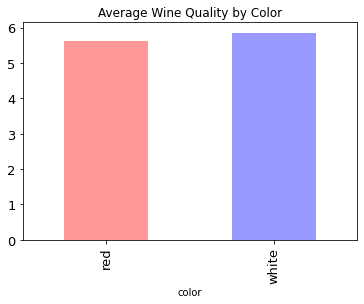

In [ ]:
wine_df.groupby('color')['quality'].mean().plot(kind='bar', 
                                                title='Average Wine Quality by Color', 
                                                fontsize=13, 
                                                color=['red', 'blue'], 
                                                alpha=0.4);

> **💡 Tip**  
이 시각화는 white wine이 red wine 보다 아주 근소하게 높은 평균 qality rating을 보여주고 있습니다.  
이 작은 차이가 어디서 오는지 좀 더 확인해 봅시다.

<h2><b> Visualization 2 </b></h2>

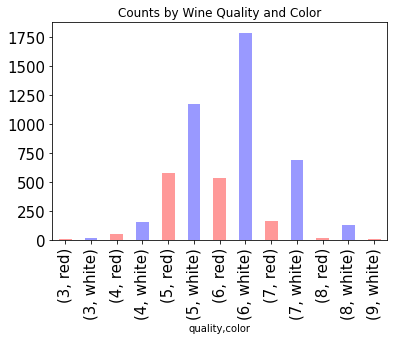

In [ ]:
counts = wine_df.groupby(['quality', 'color']).count()['pH']
counts.plot(kind='bar', color=['red','blue'], title='Counts by Wine Quality and Color', fontsize=15, alpha=0.4);

> **🔎 해설**   
- 앞서 우리는 white wine의 평균 quality rating이 아주 조금 더 높은 것을 확인했습니다.  
- 위의 시각화를 통해 좀 더 세분화된 결과를 살펴보면, **white wine이 quality rating 5,6,7 에서 더 많은 데이터 count를 가지고 있음**을 알 수 있습니다.  
이를 통해, white wine의 평균 quality rating이 다소 높은 이유를 확인할 수 있습니다. 


<h1><b> Limitations </b></h1>

> ⚠️ *지금까지의 pandas에 내장되어 있는 시각화 방법을 이용하는 것은, 시각적으로 이상적이지는 않습니다.*  
<br>
그 이유는 아래와 같습니다.  
- x 축의 label이 깔끔하지 않습니다. 
- y 축을 나타내는 title이 없습니다.
- white bar와 red bar가 서로 떨어져 있습니다.
- (9, red) 데이터가 존재하지 않아, 그래프에 나타내어 있지 않습니다. 
- y의 값은 데이터의 개수를 센 count인데, 이를 비율을 나타내는 proportion으로 바꾸어주면 더 많은 정보를 도출할 수 있습니다.  
<br>

> 이처럼 pandas가 가지고 있는 시각화를 통해서는 해결하기 어려운 부분이 존재합니다.  
그러므로 `matplotlib`이나 `seaborn`과 같은 시각화 library를 이용하는 것이 좋습니다!  
<br>
아래 이미지는 `matplotlib`을 활용하여 위의 문제들을 극복한 시각화 예시입니다.
 <img width='400' src='https://i.imgur.com/jMckyaY.png'>
 <img width='450' src='https://i.imgur.com/YeImI7J.png'>  
- 레드 와인을 나타내는 bar는 빨강, 화이트 와인을 나타내는 bar는 흰색으로 나타낼 수 있습니다.  
- 이전에는 하얀 배경이었기에 화이트 와인을 나타내는 bar는 파란색으로 나타낼 수밖에 없었지만, matplotlib library를 통해 뒤의 배경을 어두운 회색 배경으로 바꿈으로써 가능하게 되었습니다. 
- x 축과 y 축이 무엇을 나타내는지 title을 삽입할 수 있고,  
x 축의 label을 깔끔하게 quality로 나타낼 수 있습니다. 
- 단순 데이터의 개수를 나타내는 counts가 아닌, 총 개수에 대하여 몇 개를 나타내는지 proportion을 나타내는 시각화를 만들 수 있습니다. 
